In [2]:
!pip install openpyxl

In [3]:
import openpyxl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [4]:
application_details = pd.read_csv('application_record.csv')
credit_record = pd.read_csv('credit_record.csv')

In [10]:
application_details.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [60]:
application_details.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Tag
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Managers,2.0,M_Higher education
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Managers,2.0,M_Higher education
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,M_Secondary / secondary special
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special


In [5]:
application_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [11]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [13]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


### Count Plot of Categorical Features: application_details

In [14]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=application_details[feature], hue='CODE_GENDER' , data=application_details)
        plt.legend(loc='best')
        total = len(application_details[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

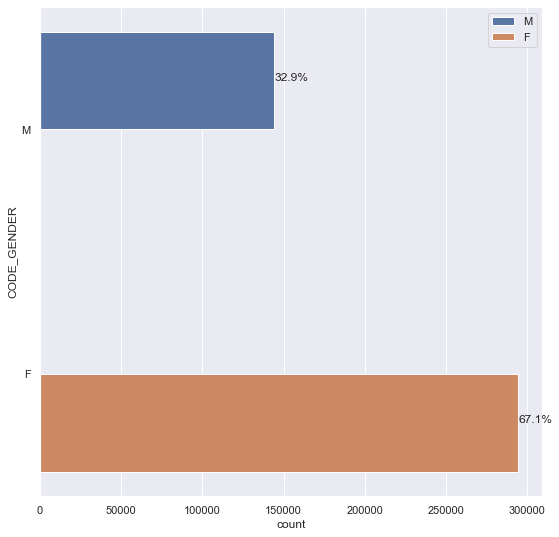

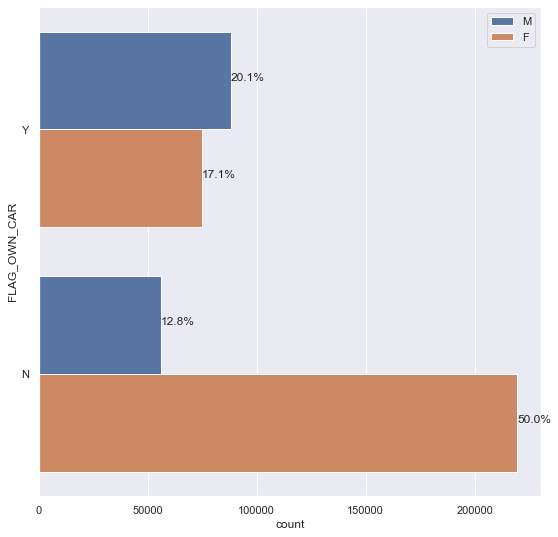

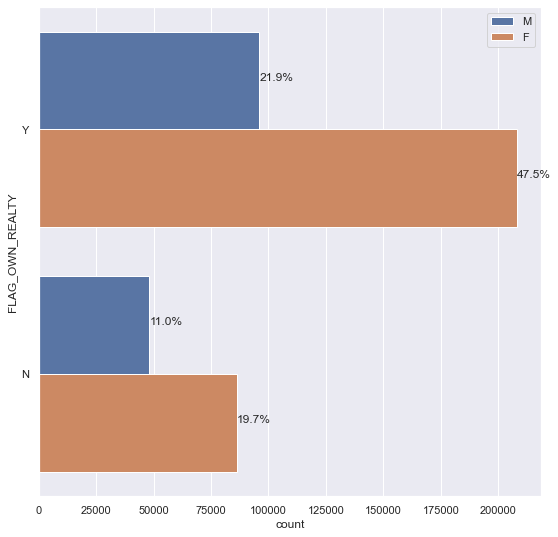

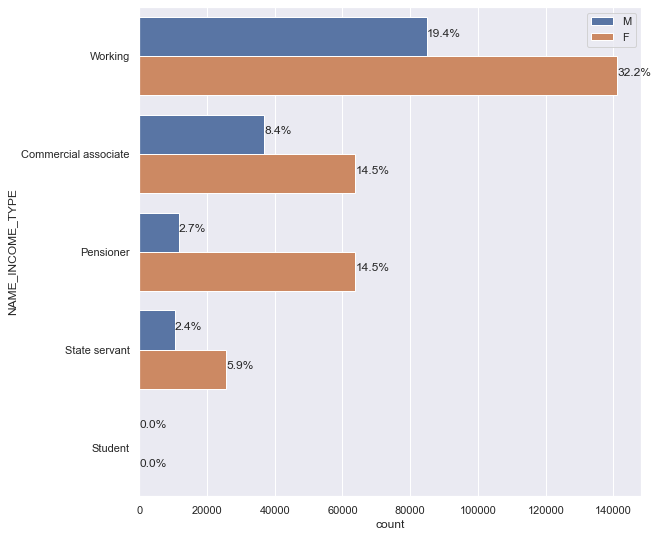

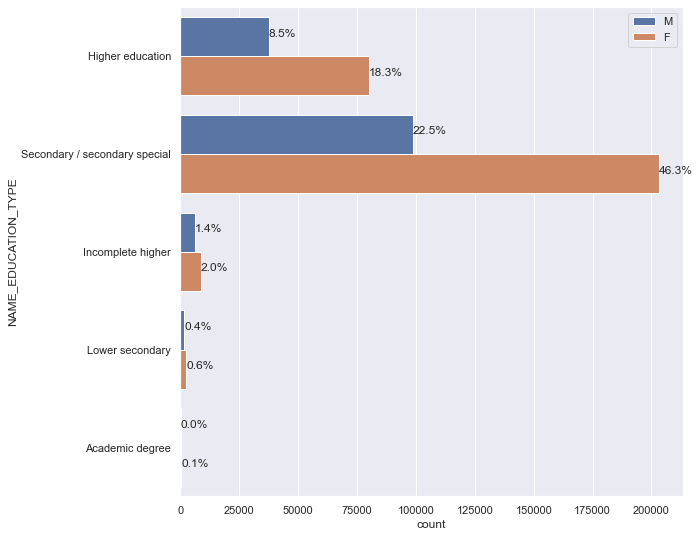

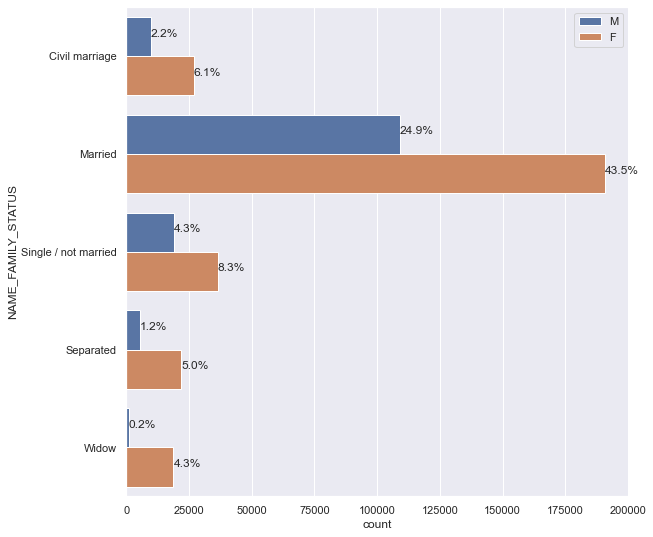

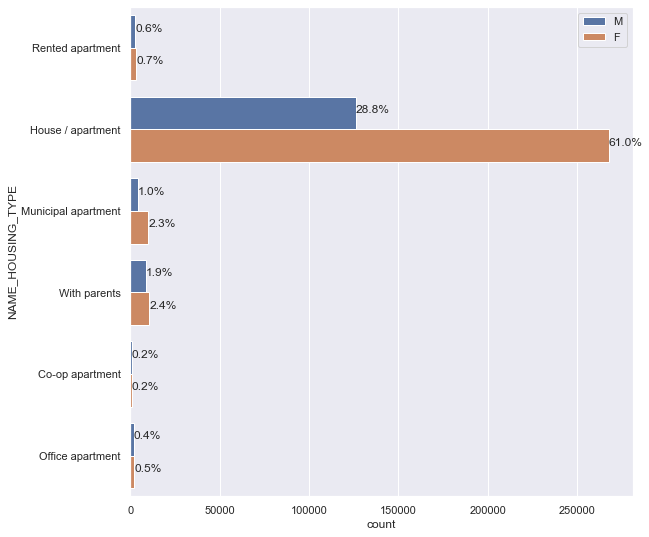

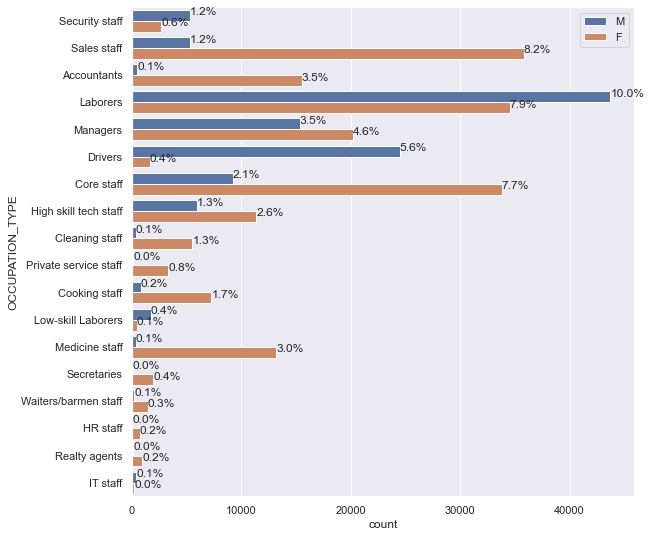

In [15]:
countplot_applicants(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])


### Count Plot of Categorical Features: credit_Record

In [22]:
def countplot_credit(features):
    for feature in features:
        plt.figure(figsize=(10, 10))
        ax=sns.countplot(y=credit_record[feature], data=credit_record)
        total = len(credit_record[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

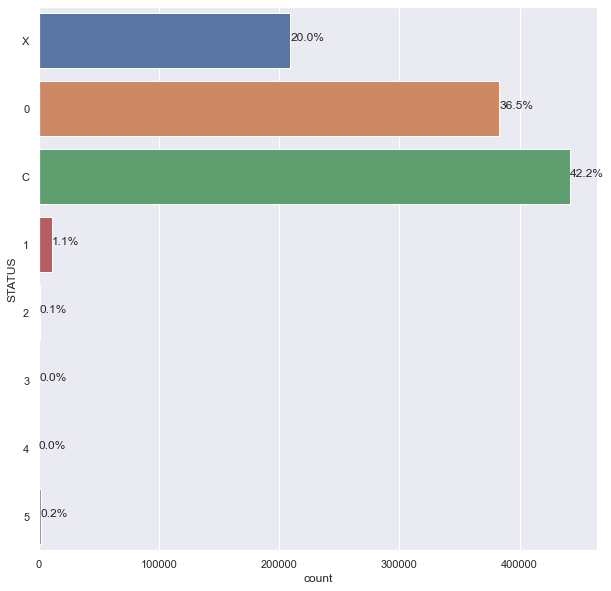

In [23]:
countplot_credit(['STATUS'])


C: loan for that month is already paid
X: no loan for that month 
0: loan is 1 to 29 days overdue 
1: loan is 30 to 59 days overdue 
2: loan is 60 to 89 days overdue 
3:loan is 90 to 119 days overdue 
4: loan is 120 to 149 days overdue 
5: loan is more than 150 days overdue

a. 20% of applicatnts does'nt have loan of the current month. b. 36.5% of applicants have overdue for 1-29 days. c. 42.2% of applicants already paid current month loan. d. 1.1% of applicants have overdue for 30-59 days. e. 0.1% of applicants have overdue for 60-89 days. f. 0% of applicants have overdue for 90-119 days. g. 0% of applicants have overdue for 120-149 days. h. 0.2% of applicants have overdue for 150 days.

### Finding Missing Values: application_details

In [19]:
application_details.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

There are 134203 missing occupations in application_details DataFrame. We can't remove these lables, instead of doing that I'll try to fill occupation details based on the insights from countplot of categorical features. We found that, majority jobs for male applicants are :- labours, and drivers majority jobs for female applicants are :- sales staff, and labours

In [26]:
def countplot_occupation(features):
    for feature in features:
        plt.figure(figsize=(40, 40))
        ax=sns.countplot(y=application_details[feature], hue='NAME_EDUCATION_TYPE' , data=application_details)
        plt.legend(loc='best')
        total = len(application_details[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

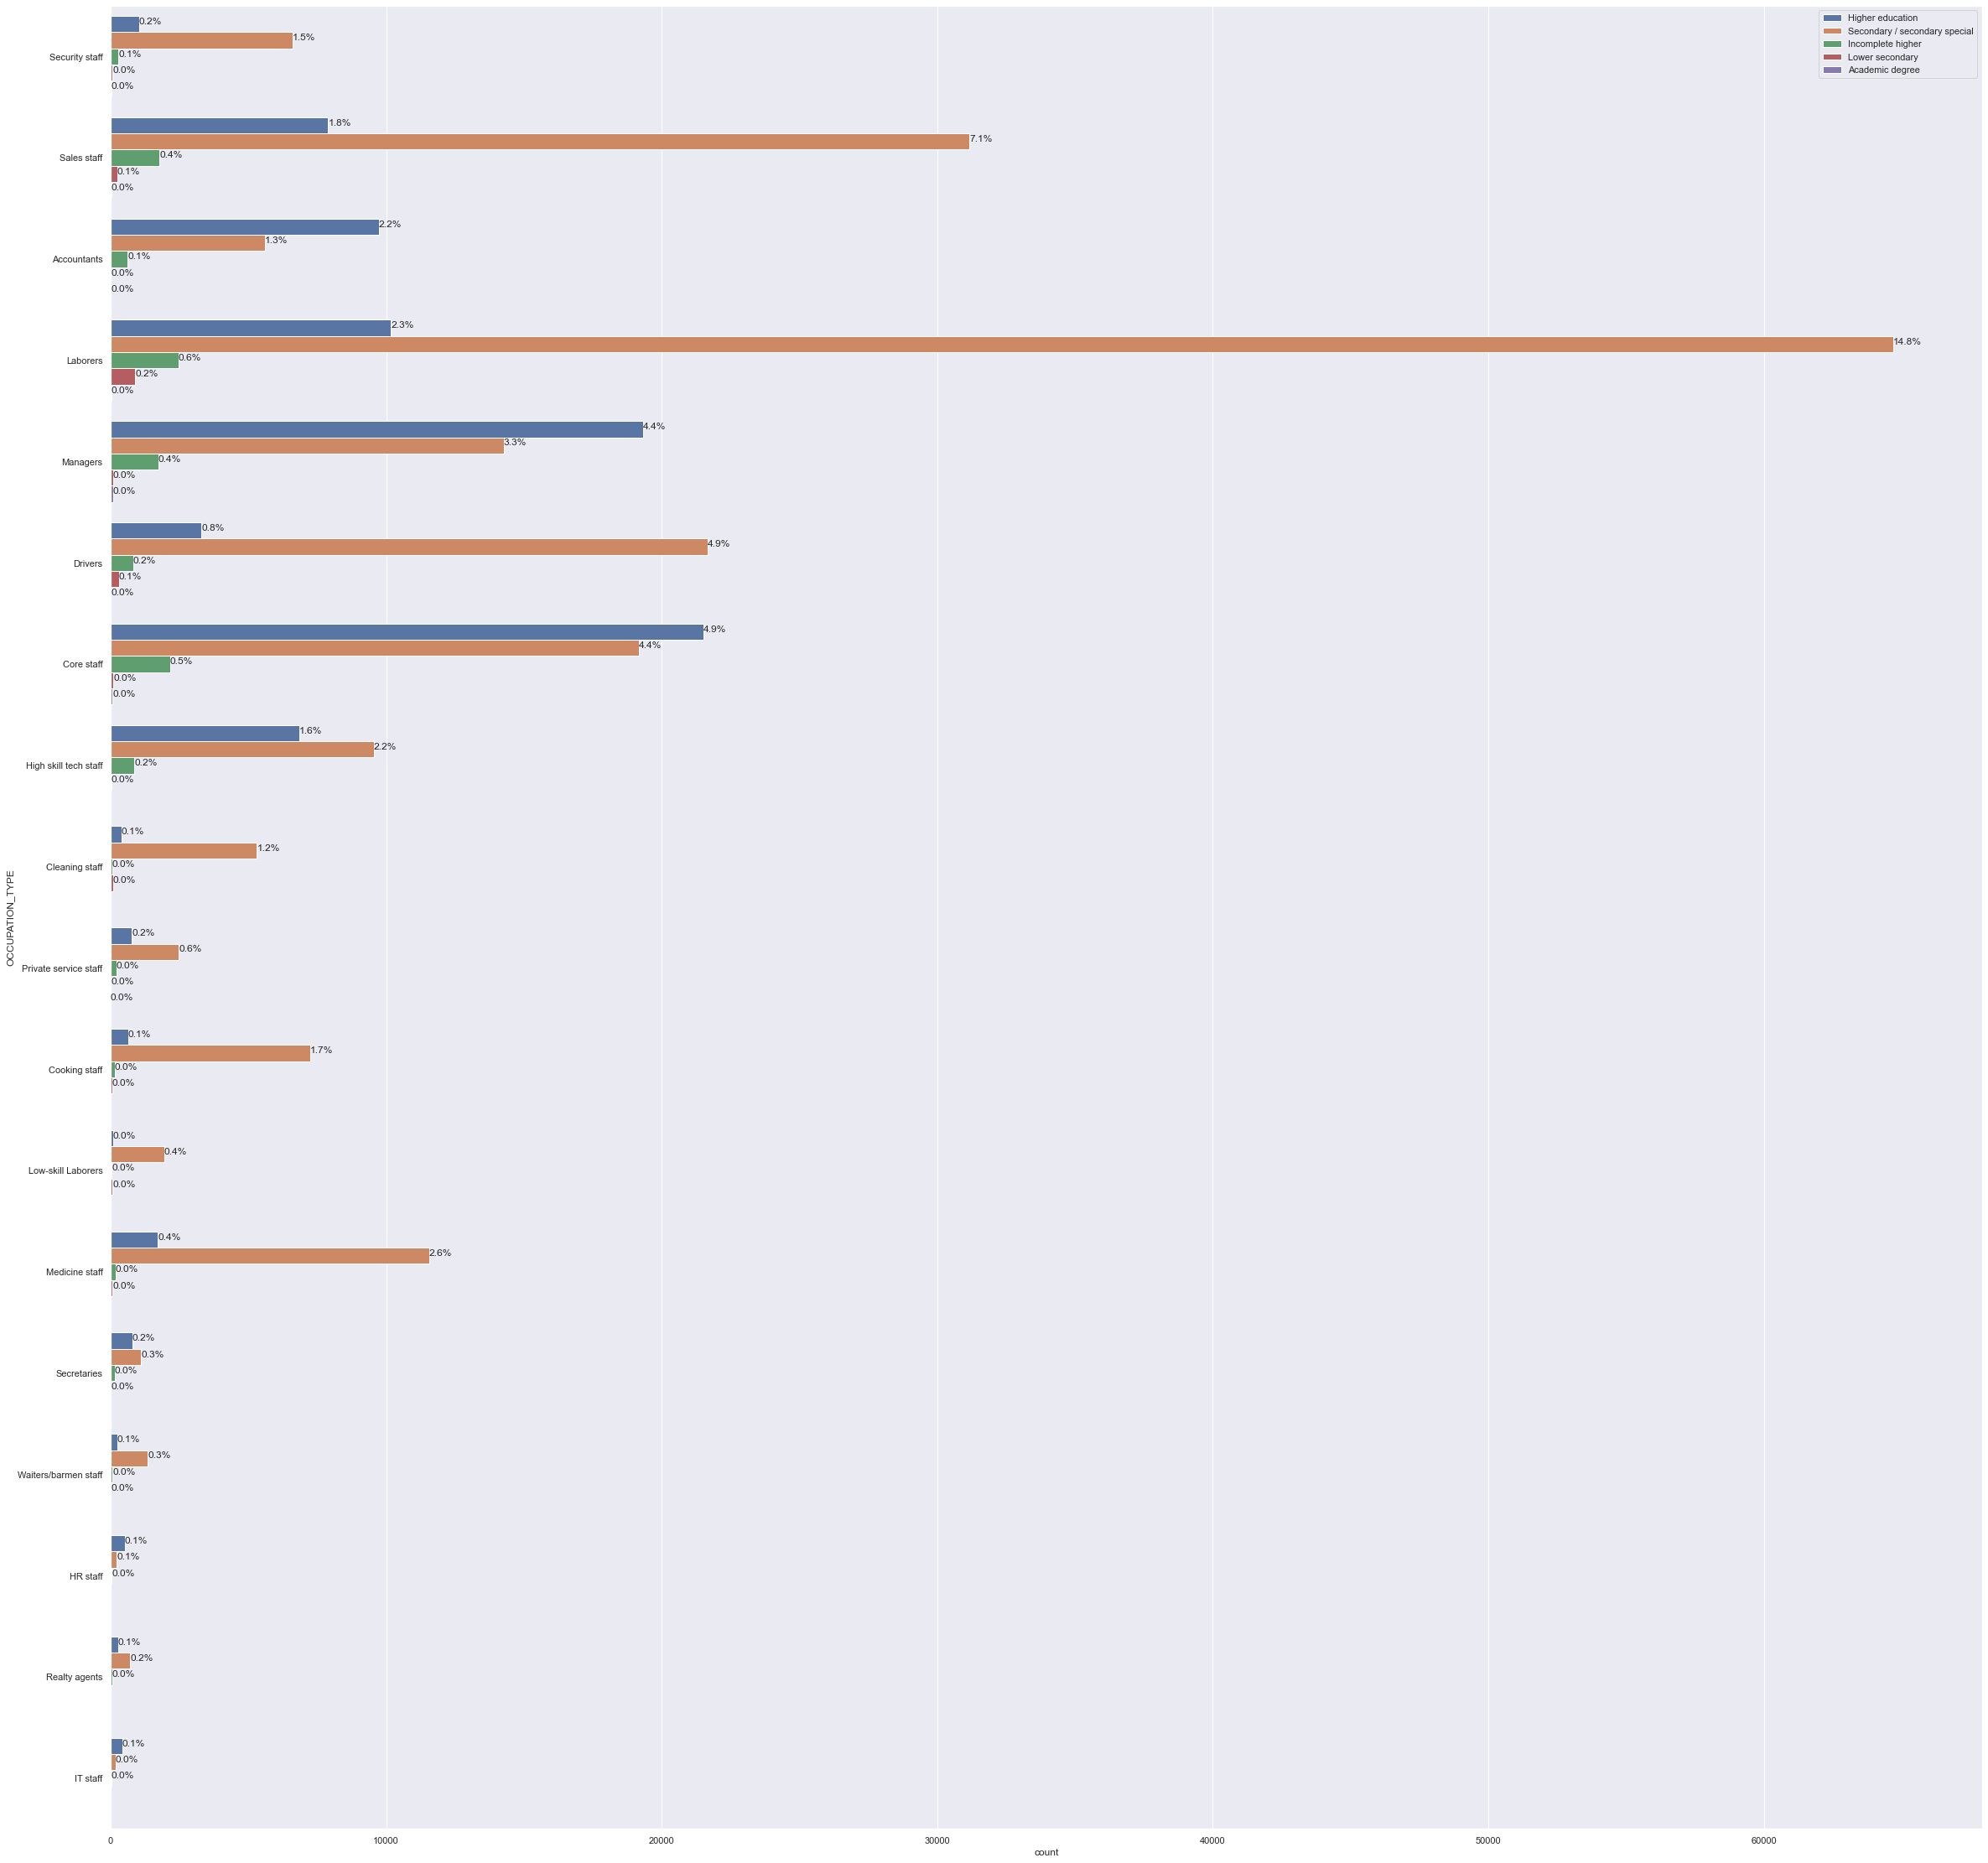

In [27]:
countplot_occupation(['OCCUPATION_TYPE'])

In [28]:
def occupation_by_education_by_gender(occupations, educations, genders, length):
    Gender = []
    Education = []
    Occupation = []
    Percentage = []
    for gender in genders:
        for education in educations:
            for occupation in occupations:
                Gender.append(gender)
                Education.append(education)
                Occupation.append(occupation)
                temp_df_1=application_details.loc[application_details['OCCUPATION_TYPE'] == occupation]
                temp_df_2=temp_df_1.loc[temp_df_1['CODE_GENDER'] == gender]
                temp_df_3=temp_df_2.loc[temp_df_2['NAME_EDUCATION_TYPE'] == education]
                length_filter = len(temp_df_3)
                Percentage.append(length_filter/length)
    percent_dict={
        'Gender': Gender,
        'Education': Education,
        'Occupation': Occupation,
        'Popularity Percentage': Percentage
    }
    df = pd.DataFrame(percent_dict)
    df.to_excel('Occupation_popularity_index.xlsx', index=False)


In [29]:
occupation_by_education_by_gender(list(application_details['OCCUPATION_TYPE'].unique()), list(application_details['NAME_EDUCATION_TYPE'].unique()), list(application_details['CODE_GENDER'].unique()), len(application_details))

In [30]:
occupation_popularity = pd.read_excel('Occupation_popularity_index.xlsx')

In [31]:
occupation_popularity['Tag'] = occupation_popularity['Gender']+ '_' + occupation_popularity['Education']

In [48]:
def Dict(data):
    tag_list=list(data['Tag'].unique())
    popular_occupation = []
    data_grouped = data.groupby('Tag')
    for tag in tag_list:
        grouped_data = data_grouped.get_group(tag)
        popular_occupation.append(grouped_data.loc[grouped_data['Popularity Percentage'] == max(list(grouped_data['Popularity Percentage']))]['Occupation'].tolist()[0])
    Tag_dict={
        'Tag': tag_list,
        'Occupation': popular_occupation
    }
    return Tag_dict

In [49]:
dict_df = Dict(occupation_popularity)

In [50]:
tag_data = pd.DataFrame(dict_df)

In [51]:
tag_data

,Tag,Occupation
0,M_Higher education,Managers
1,M_Secondary / secondary special,Laborers
2,M_Incomplete higher,Laborers
3,M_Lower secondary,Laborers
4,M_Academic degree,Core staff
5,F_Higher education,Core staff
6,F_Secondary / secondary special,Laborers
7,F_Incomplete higher,Core staff
8,F_Lower secondary,Laborers
9,F_Academic degree,Managers


In [52]:
tag_g = list(tag_data['Tag'])
occu_g = list(tag_data['Occupation'])
tag_dict = {}
for index in range(len(tag_g)):
    tag_dict[tag_g[index]] = occu_g[index]

In [53]:
tag_dict

{'M_Higher education': 'Managers',
 'M_Secondary / secondary special': 'Laborers',
 'M_Incomplete higher': 'Laborers',
 'M_Lower secondary': 'Laborers',
 'M_Academic degree': 'Core staff',
 'F_Higher education': 'Core staff',
 'F_Secondary / secondary special': 'Laborers',
 'F_Incomplete higher': 'Core staff',
 'F_Lower secondary': 'Laborers',
 'F_Academic degree': 'Managers'}

In [54]:
application_details['Tag'] = application_details['CODE_GENDER']+ '_' + application_details['NAME_EDUCATION_TYPE']

In [55]:
def Replace_nan_occupation(df):
    for key in tag_dict:
        if df['Tag'] == key and pd.isnull(df['OCCUPATION_TYPE']):
            df['OCCUPATION_TYPE'] = tag_dict[key]
    return df

In [56]:
len(application_details)

438557

In [57]:
application_details = application_details.apply(Replace_nan_occupation, axis=1)

In [58]:
len(application_details)

438557

In [59]:
application_details.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
Tag                    0
dtype: int64

### Converting Days format features to readable format

In [61]:
application_details['AGE'] = np.ceil(pd.to_timedelta(application_details['DAYS_BIRTH'], unit='D').dt.days / -365.25)

In [62]:
application_details['AGE']

0         33.0
1         33.0
2         59.0
3         53.0
4         53.0
          ... 
438552    63.0
438553    44.0
438554    23.0
438555    60.0
438556    52.0
Name: AGE, Length: 438557, dtype: float64

In [63]:
application_details.drop('DAYS_BIRTH', axis=1, inplace=True)

In [64]:
application_details.loc[(application_details['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0
application_details['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(application_details['DAYS_EMPLOYED'], unit='D').dt.days / -365.25)


In [65]:
application_details['YEARS_EMPLOYED']

0         13.0
1         13.0
2          4.0
3          9.0
4          9.0
          ... 
438552    -0.0
438553     9.0
438554     2.0
438555    -0.0
438556     4.0
Name: YEARS_EMPLOYED, Length: 438557, dtype: float64

In [66]:
application_details.drop(['DAYS_EMPLOYED', 'Tag'], axis=1, inplace=True)

In [67]:
application_details.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED'],
      dtype='object')

##### Encoding Categorical Features to Numerical Values

In [68]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(application_details[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        application_details.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [69]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE']
Cat_to_Num(categorical_features)

CODE_GENDER --> {'F': 0, 'M': 1}
FLAG_OWN_CAR --> {'N': 0, 'Y': 1}
FLAG_OWN_REALTY --> {'N': 0, 'Y': 1}
NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
OCCUPATION_TYPE --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17}
NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Seconda

In [70]:
application_details.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0


#### Credit_record data

In [71]:
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
credit_record.replace({'STATUS' : convert_to}, inplace=True)

In [72]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


In [73]:
credit_record = credit_record.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)

In [74]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0
...,...,...,...
5150482,0,18,0
5150483,0,18,0
5150484,0,13,0


### Creating Credit Approval Status

In [75]:
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0

In [76]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1.0
5001712,0,19,0,1.0
5001713,0,22,0,1.0
5001714,0,15,0,1.0
5001715,0,60,0,1.0
...,...,...,...,...
5150482,0,18,0,1.0
5150483,0,18,0,1.0
5150484,0,13,0,1.0


In [77]:
np.unique(credit_record['CREDIT_APPROVAL_STATUS'])

array([0., 1.])

In [79]:
credit_record['CREDIT_APPROVAL_STATUS'] = credit_record['CREDIT_APPROVAL_STATUS'].astype('int')
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1
5001712,0,19,0,1
5001713,0,22,0,1
5001714,0,15,0,1
5001715,0,60,0,1
...,...,...,...,...
5150482,0,18,0,1
5150483,0,18,0,1
5150484,0,13,0,1


In [83]:
credit_record.drop(['Bad_Debt', 'Good_Debt', 'Neutral_Debt'], axis=1, inplace=True)

KeyError: "['Bad_Debt' 'Good_Debt' 'Neutral_Debt'] not found in axis"

In [84]:
credit_record

STATUS,CREDIT_APPROVAL_STATUS
ID,
5001711,1
5001712,1
5001713,1
5001714,1
5001715,1
...,...
5150482,1
5150483,1
5150484,1


# Merging Both application_details and credit_record data

In [85]:
Final_Credit_data = application_details.merge(credit_record, how='inner', on=['ID'])

In [86]:
Final_Credit_data.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_APPROVAL_STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0,1
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
5,5008810,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
6,5008811,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
7,5008812,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1
8,5008813,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1
9,5008814,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1


In [87]:
Final_Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      36457 non-null  int64  
 1   CODE_GENDER             36457 non-null  int64  
 2   FLAG_OWN_CAR            36457 non-null  int64  
 3   FLAG_OWN_REALTY         36457 non-null  int64  
 4   CNT_CHILDREN            36457 non-null  int64  
 5   AMT_INCOME_TOTAL        36457 non-null  float64
 6   NAME_INCOME_TYPE        36457 non-null  int64  
 7   NAME_EDUCATION_TYPE     36457 non-null  int64  
 8   NAME_FAMILY_STATUS      36457 non-null  int64  
 9   NAME_HOUSING_TYPE       36457 non-null  int64  
 10  FLAG_MOBIL              36457 non-null  int64  
 11  FLAG_WORK_PHONE         36457 non-null  int64  
 12  FLAG_PHONE              36457 non-null  int64  
 13  FLAG_EMAIL              36457 non-null  int64  
 14  OCCUPATION_TYPE         36457 non-null

In [88]:
credit_approval_data = Final_Credit_data.drop('ID', axis=1, inplace=False)

In [89]:
credit_approval_data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_APPROVAL_STATUS
0,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
1,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
2,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0,1
3,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
4,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,315000.0,4,4,1,1,1,0,0,0,10,2.0,48.0,7.0,0
36453,0,0,1,0,157500.0,0,1,1,1,1,0,1,1,11,2.0,34.0,4.0,0
36454,0,0,1,0,157500.0,1,1,1,1,1,0,1,1,11,2.0,34.0,4.0,1
36455,0,0,1,0,283500.0,4,4,1,1,1,0,0,0,14,2.0,50.0,2.0,1


In [90]:
credit_approval_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,36457.0,0.329895,0.470181,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_CAR,36457.0,0.379708,0.485321,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,36457.0,0.672189,0.469422,0.0,0.0,1.0,1.0,1.0
CNT_CHILDREN,36457.0,0.430315,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,186685.736662,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
NAME_INCOME_TYPE,36457.0,2.398195,1.734032,0.0,1.0,4.0,4.0,4.0
NAME_EDUCATION_TYPE,36457.0,3.097183,1.341292,0.0,1.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,36457.0,1.367885,0.954557,0.0,1.0,1.0,1.0,4.0
NAME_HOUSING_TYPE,36457.0,1.282881,0.951675,0.0,1.0,1.0,1.0,5.0
FLAG_MOBIL,36457.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### Splitting the credit_approval_data into training and testing sets

In [122]:
from sklearn.model_selection import train_test_split

In [137]:
X = credit_approval_data.drop('CREDIT_APPROVAL_STATUS', axis=1)
y = credit_approval_data['CREDIT_APPROVAL_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [146]:
X_test

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
21900,0,0,1,0,202500.0,2,4,2,1,1,0,0,0,11,1.0,47.0,5.0
24293,1,1,0,0,675000.0,0,1,1,1,1,0,1,0,10,2.0,50.0,3.0
19633,0,0,0,0,234000.0,2,1,0,1,1,0,0,1,3,2.0,61.0,15.0
2496,0,1,1,0,445500.0,0,1,1,1,1,0,0,0,10,2.0,35.0,2.0
25932,0,1,0,0,225000.0,4,4,1,2,1,0,0,0,8,2.0,34.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12738,1,1,1,0,225000.0,4,4,1,1,1,0,0,0,8,2.0,42.0,8.0
29745,0,0,0,1,45000.0,4,4,1,1,1,0,0,0,3,3.0,38.0,1.0
17518,1,1,1,0,360000.0,4,1,1,1,1,0,0,0,10,2.0,61.0,11.0
34043,0,0,1,0,382500.0,0,4,3,1,1,0,0,0,10,1.0,46.0,15.0


# Creating Decison Tree Model

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
DT_model = DecisionTreeClassifier()

### Training Model

In [140]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [141]:
y_pred = DT_model.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy_score(y_test, y_pred)*100

99.40574145181934